In [49]:
import statsmodels.formula.api as smf
import pandas as pd
import geopandas as gpd
from sklearn.metrics import roc_auc_score
import numpy as np
import contextily as cx
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update(
    {
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
    }
)
plt.style.use("seaborn-muted")

In [50]:
train = pd.read_csv('15_modified_data/train_data.csv')
val = pd.read_csv('15_modified_data/val_data.csv')

In [51]:
model = smf.logit(
    "nonzero_tip ~ shared_trip_authorized + max_temp + precip + wind_speed + C(pickup_community_name) + C(month) + C(day_of_week) + C(hour)", data=train).fit()
model.summary()


Optimization terminated successfully.
         Current function value: 0.452022
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            nonzero_tip   No. Observations:                83703
Model:                          Logit   Df Residuals:                    83582
Method:                           MLE   Df Model:                          120
Date:                Mon, 11 Apr 2022   Pseudo R-squ.:                 0.04045
Time:                        15:33:04   Log-Likelihood:                -37836.
converged:                       True   LL-Null:                       -39430.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                             -1.4276      0.143     -9.964      0.000      -1.708      -1.147
shared_trip_authorized[T.True]                        -0.8832      0.030    -29.212      0.000      -0.942      -0.824
C(pickup_community_name)[T.ARCHER HEIGHTS]            -0.4622      0.265     -1.745      0.081      -0.981       0.057
C(pickup_community_name)[T.ARMOUR SQUARE]             -0.1671      0.167     -1.000      0.317      -0.494       0.160
C(pickup_community_name)[T.ASHBURN]                   -1.7327      0.378     -4.589      0.000      -2.473      -0.993
C(pickup_community_name)[T.AUBURN GRESHAM]            -1.5534      0.249     -6.241      0.000      -2.041      -1.066
C(pickup_community_name)[T.AUSTIN]                    -1.4874      0.199     -7.486      0.000      -1.877      -1.098
C(pickup_community_name)[T.AVALON PARK]               -0.5976      0.316     -1.892      0.058      -1.217       0.021
C(pickup_community_name)[T.AVONDALE]                  -0.1200      0.135     -0.892      0.372      -0.384       0.144
C(pickup_community_name)[T.BELMONT CRAGIN]            -0.6741      0.169     -3.984      0.000      -1.006      -0.343
C(pickup_community_name)[T.BEVERLY]                   -0.5528      0.318     -1.736      0.082      -1.177       0.071
C(pickup_community_name)[T.BRIDGEPORT]                -0.4650      0.169     -2.751      0.006      -0.796      -0.134
C(pickup_community_name)[T.BRIGHTON PARK]             -0.8934      0.220     -4.055      0.000      -1.325      -0.462
C(pickup_community_name)[T.BURNSIDE]                  -1.1091      0.746     -1.487      0.137      -2.571       0.353
C(pickup_community_name)[T.CALUMET HEIGHTS]           -1.1770      0.384     -3.063      0.002      -1.930      -0.424
C(pickup_community_name)[T.CHATHAM]                   -1.0959      0.207     -5.302      0.000      -1.501      -0.691
C(pickup_community_name)[T.CHICAGO LAWN]              -1.5934      0.278     -5.727      0.000      -2.139      -1.048
C(pickup_community_name)[T.CLEARING]                  -0.8011      0.338     -2.372      0.018      -1.463      -0.139
C(pickup_community_name)[T.DOUGLAS]                   -0.8078      0.184     -4.382      0.000      -1.169      -0.446
C(pickup_community_name)[T.DUNNING]                   -0.3319      0.230     -1.441      0.150      -0.783       0.120
C(pickup_community_name)[T.EAST GARFIELD PARK]        -0.8437      0.218     -3.866      0.000      -1.271      -0.416
C(pickup_community_name)[T.EAST SIDE]                 -0.4823      0.635     -0.759      0.448      -1.727       0.763
C(pickup_community_name)[T.EDGEWATER]                  0.2021      0.127      1.591      0.112      -0.047       0.451
C(pickup_community_name)[T.EDISON PARK]               -0.0760      0.372     -0.204      0.838      -0.806       0.654
C(pickup_community_name)[T.E

In [111]:
df = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0].reset_index()
df = df[df["index"].str.contains("hour")]
df["index"] = df["index"].str.strip("C(hour)[]")
df["index"] = df["index"].str[2:]
df["lower"] = np.exp(df['[0.025'])
df["upper"] = np.exp(df['0.975]'])


/var/folders/lz/cw17t6h96s12fy8v30l0cs880000gn/T/ipykernel_75597/2712482143.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((lower,upper),(y,y),'ro-',color='orange')


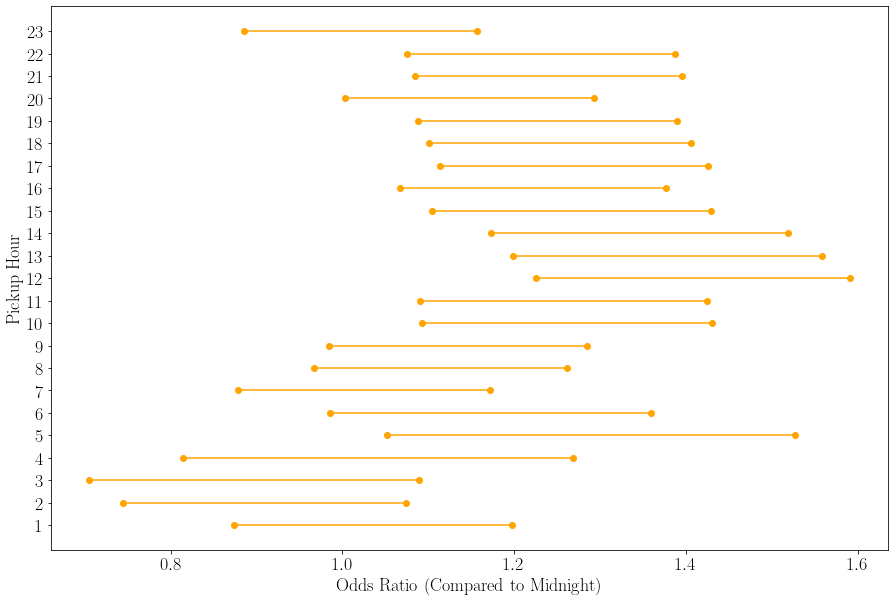

In [112]:
plt.rcParams["figure.figsize"] = (15,10)
for lower,upper,y in zip(df['lower'],df["upper"],range(len(df))):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
plt.yticks(range(len(df)),list(df['index']))
plt.ylabel("Pickup Hour")
plt.xlabel("Odds Ratio (Compared to Midnight)")
plt.savefig("26_images/odds_pickup_area.png", bbox_inches="tight", dpi=400)
plt.show()

In [52]:
df = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0].reset_index()
df = df[df["index"].str.contains("pickup")]

In [53]:
df = df[df["index"].str.contains("pickup")]
df["index"] = df["index"].str.strip("C(pickup_community_name)[]")
df["community"] = df["index"].str[2:]


In [54]:
gdf = gpd.read_file("10_original_data/community_areas.geojson")

In [55]:
gdf.head()

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."


In [56]:
help = gdf.merge(df, on="community", how = "left")
help["coef"] = np.exp(help["coef"])
help.loc[help["P>|z|"] > 0.05, "coef"] = np.nan


In [81]:
boundary = help[help["community"] == "ALBANY PARK"]

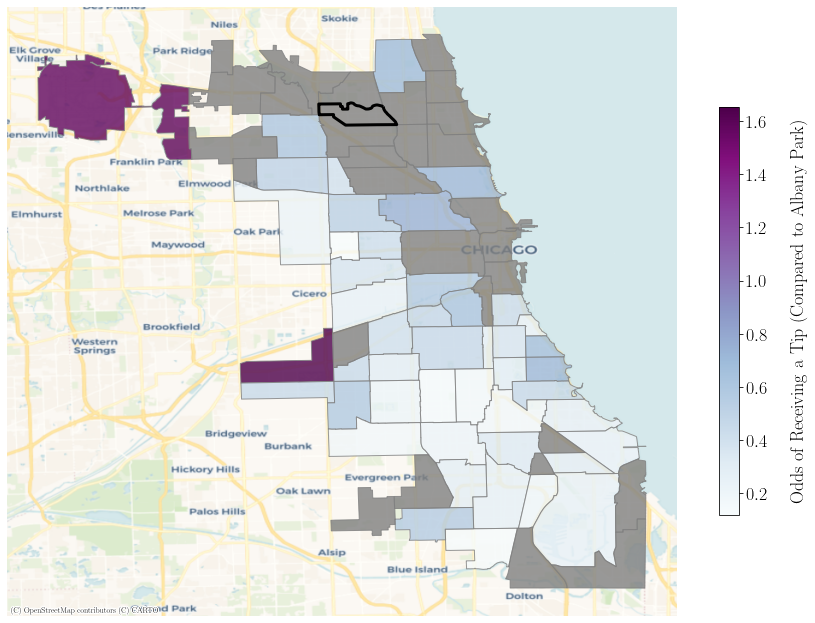

In [82]:
plt.rcParams.update({'font.size': 18})
ax = help.plot(
        figsize=(15, 15),
        column="coef",
        cmap="BuPu",
        legend=True,
        legend_kwds={
            "shrink": 0.5,
            "label": "\nOdds of Receiving a Tip (Compared to Albany Park)",
        },
        alpha=0.8,
        edgecolor="#808080",
        missing_kwds = dict(color='grey', label='No Data')
    )
boundary.boundary.plot(ax=ax, edgecolor="black", linewidth=3)
cx.add_basemap(ax, crs="EPSG:4326", source=cx.providers.CartoDB.Voyager)
ax.set_axis_off()
plt.savefig("26_images/odds_pickup_area.png", bbox_inches="tight", dpi=400)

In [59]:
help.head()

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry,index,coef,std err,z,P>|z|,[0.025,0.975]
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",T.DOUGLAS,0.445838,0.184,-4.382,0.000,-1.169,-0.446
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...",T.OAKLAND,0.266255,0.406,-3.262,0.001,-2.118,-0.528
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...",T.FULLER PARK,0.276761,0.529,-2.428,0.015,-2.321,-0.248
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ...",T.GRAND BOULEVARD,0.370760,0.203,-4.881,0.000,-1.391,-0.594
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...",T.KENWOOD,0.672872,0.189,-2.095,0.036,-0.767,-0.026


In [60]:
df.head()

,index,coef,std err,z,P>|z|,[0.025,0.975],community
2,T.ARCHER HEIGHTS,-0.4622,0.265,-1.745,0.081,-0.981,0.057,ARCHER HEIGHTS
3,T.ARMOUR SQUARE,-0.1671,0.167,-1.000,0.317,-0.494,0.160,ARMOUR SQUARE
4,T.ASHBURN,-1.7327,0.378,-4.589,0.000,-2.473,-0.993,ASHBURN
5,T.AUBURN GRESHAM,-1.5534,0.249,-6.241,0.000,-2.041,-1.066,AUBURN GRESHAM
6,T.AUSTIN,-1.4874,0.199,-7.486,0.000,-1.877,-1.098,AUSTIN


In [61]:
params = model.params.reset_index()

In [62]:
params[params["index"].str.contains("pickup")]

,index,0
2,C(pickup_community_name)[T.ARCHER HEIGHTS],-0.462162
3,C(pickup_community_name)[T.ARMOUR SQUARE],-0.167062
4,C(pickup_community_name)[T.ASHBURN],-1.732680
5,C(pickup_community_name)[T.AUBURN GRESHAM],-1.553400
6,C(pickup_community_name)[T.AUSTIN],-1.487389
...,...,...
73,C(pickup_community_name)[T.WEST LAWN],-0.555330
74,C(pickup_community_name)[T.WEST PULLMAN],-1.996444
75,C(pickup_community_name)[T.WEST RIDGE],-0.371960
76,C(pickup_community_name)[T.WEST TOWN],-0.285566


In [115]:
train_tot = pd.concat([train, val])
test = pd.read_csv("15_modified_data/test_data.csv")

In [ ]:
model = smf.logit(
    "nonzero_tip ~ shared_trip_authorized + max_temp + precip + wind_speed + C(pickup_community_name) + C(month) + C(day_of_week) + C(hour)", data=train_tot).fit()
model.summary()

In [116]:
probs = model.predict(test)
roc_auc_score(test["nonzero_tip"], probs)

0.6320912202205398

In [118]:
probs.to_csv("simple_log_mod.csv")